In [1]:
import numpy as np
import pandas as pd

# Seed for reproducibility
np.random.seed(0)

# Number of entries
n_entries = 1000

# Simulating dataset
time = np.linspace(0, 100, n_entries)  # Time variable
temperature = 20 + 5 * np.sin(np.pi * time / 50) + np.random.normal(0, 0.5, n_entries)  # Temperature (with some noise)
pressure = 1013 + 20 * np.cos(np.pi * time / 25) + np.random.normal(0, 1, n_entries)  # Pressure (with some noise)
chemical_concentration = 5 + 2 * np.sin(np.pi * time / 10) + np.random.normal(0, 0.2, n_entries)  # Chemical concentration

# Creating DataFrame
ninja_data = pd.DataFrame({
    'Time': time,
    'Temperature': temperature,
    'Pressure': pressure,
    'Chemical Concentration': chemical_concentration
})

In [2]:
ninja_data

,Time,Temperature,Pressure,Chemical Concentration
0,0.0000,20.882026,1033.555963,4.693416
1,0.1001,20.231526,1033.890892,4.720490
2,0.2002,20.552262,1032.571356,5.134934
3,0.3003,21.214783,1033.090475,4.996730
4,0.4004,21.059555,1033.202742,5.234754
...,...,...,...,...
995,99.5996,20.080659,1033.072439,5.164919
996,99.6997,19.806464,1034.387284,4.630102
997,99.7998,19.984203,1033.152105,4.835813
998,99.8999,19.394747,1031.856516,4.694612


1. Data Transformation:

Goal: Prepare the data for analysis by applying transformations.
Steps and Hints:
Normalization: Transform the data so that each variable has a mean of 0 and standard deviation of 1. Use numpy for calculations.
Logarithmic Scaling (Optional): Apply logarithmic scaling if the data has a wide range of values. This can be done using np.log.
Fourier Transformation: Utilize Fourier transformation to analyze frequency components in the data. This can be insightful for time-series data.
Tools: Explore np.fft.fft for Fourier transformation.

In [4]:
# Normalization
normalized_data = ninja_data.copy()
for column in ['Temperature', 'Pressure', 'Chemical Concentration']:
    mean = ninja_data[column].mean()
    std = ninja_data[column].std()
    normalized_data[column] = (ninja_data[column] - mean) / std
print(normalized_data)

         Time  Temperature  Pressure  Chemical Concentration
0      0.0000     0.253054  1.444895               -0.206291
1      0.1001     0.071093  1.468476               -0.187444
2      0.2002     0.160811  1.375573                0.101064
3      0.3003     0.346135  1.412122                0.004856
4      0.4004     0.302714  1.420026                0.170552
..        ...          ...       ...                     ...
995   99.5996     0.028892  1.410852                0.121938
996   99.6997    -0.047807  1.503425               -0.250366
997   99.7998     0.001911  1.416461               -0.107164
998   99.8999    -0.162974  1.325244               -0.205458
999  100.0000    -0.043757  1.313452               -0.004089

[1000 rows x 4 columns]


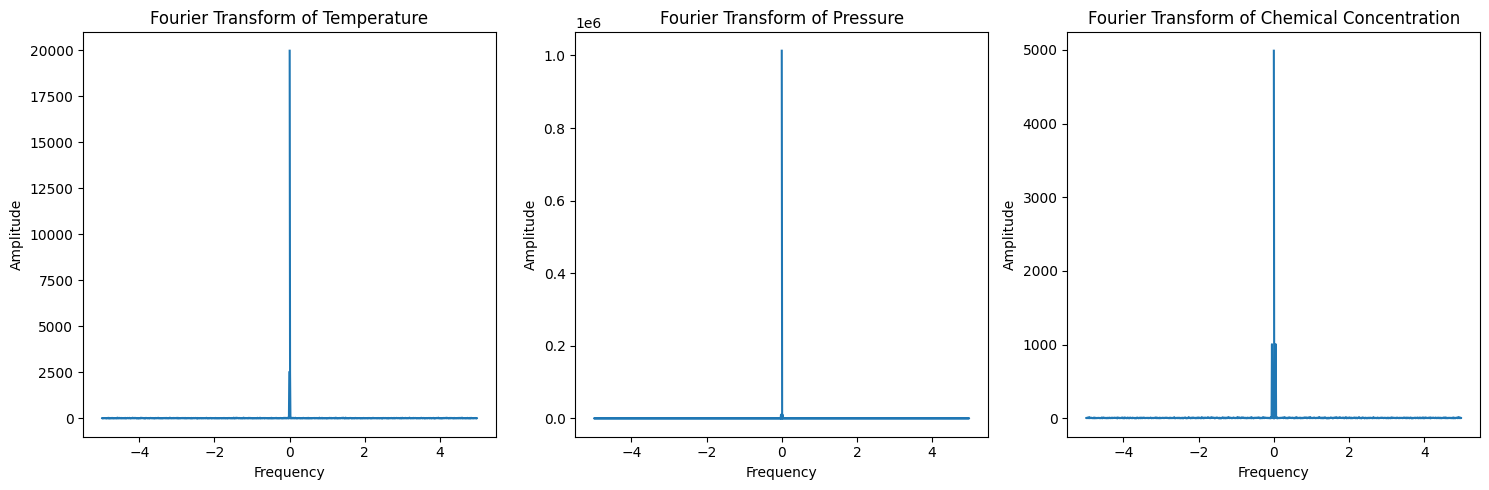

In [5]:
import matplotlib.pyplot as plt

# Fourier Transformation
fft_temperature = np.fft.fft(ninja_data['Temperature'])
fft_pressure = np.fft.fft(ninja_data['Pressure'])
fft_chemical_concentration = np.fft.fft(ninja_data['Chemical Concentration'])

# Frequency components
freq = np.fft.fftfreq(n_entries, (time[1] - time[0]))

# Plotting the Fourier Transform results
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(freq, np.abs(fft_temperature))
plt.title('Fourier Transform of Temperature')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 2)
plt.plot(freq, np.abs(fft_pressure))
plt.title('Fourier Transform of Pressure')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 3)
plt.plot(freq, np.abs(fft_chemical_concentration))
plt.title('Fourier Transform of Chemical Concentration')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


2. Statistical Analysis:

Goal: Extract statistical insights from the data.
Steps and Hints:
Descriptive Statistics: Use pandas describe() function to get an overview of the data.
Correlation Analysis: Calculate and interpret the correlation between variables using pandas corr() function.
Inferential Statistics: Consider conducting hypothesis tests or regression analysis to draw deeper insights.
Tools: Explore scipy.stats for advanced statistical functions.

In [6]:
ninja_data.describe()

,Time,Temperature,Pressure,Chemical Concentration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,50.000000,19.977372,1013.033617,4.989754
std,28.910854,3.574943,14.203350,1.436505
min,0.000000,13.897407,990.284418,2.559310
25%,25.000000,16.386984,998.852247,3.576024
50%,50.000000,20.008666,1012.950967,4.970976
75%,75.000000,23.570373,1027.062114,6.398067
max,100.000000,26.030294,1035.471676,7.486763


In [9]:
correlation_matrix = ninja_data.corr()
correlation_matrix

,Time,Temperature,Pressure,Chemical Concentration
Time,1.000000,-0.770696,-0.001946,-0.156113
Temperature,-0.770696,1.000000,0.007112,-0.003277
Pressure,-0.001946,0.007112,1.000000,-0.000863
Chemical Concentration,-0.156113,-0.003277,-0.000863,1.000000


In [8]:
from scipy.stats import ttest_ind

# Hypothesis Testing
t_stat, p_val = ttest_ind(ninja_data['Temperature'], ninja_data['Pressure'])
print(f"\nT-test Results:\nT-statistic: {t_stat}\nP-value: {p_val}")



T-test Results:
T-statistic: -2144.0980433720797
P-value: 0.0


3. Data Visualization:

Goal: Create visual representations of your findings.
Steps and Hints:
Heatmaps: Use heatmaps to visualize correlation matrices. This can be done with seaborn.
Multi-dimensional Scatter Plots: Create scatter plots for pairs of variables to explore their relationships. seaborn’s pairplot is useful here.
Fourier Transform Visualizations: Plot the amplitude vs. frequency graphs for the Fourier transformed data.
Tools: Utilize matplotlib and seaborn for creating plots.

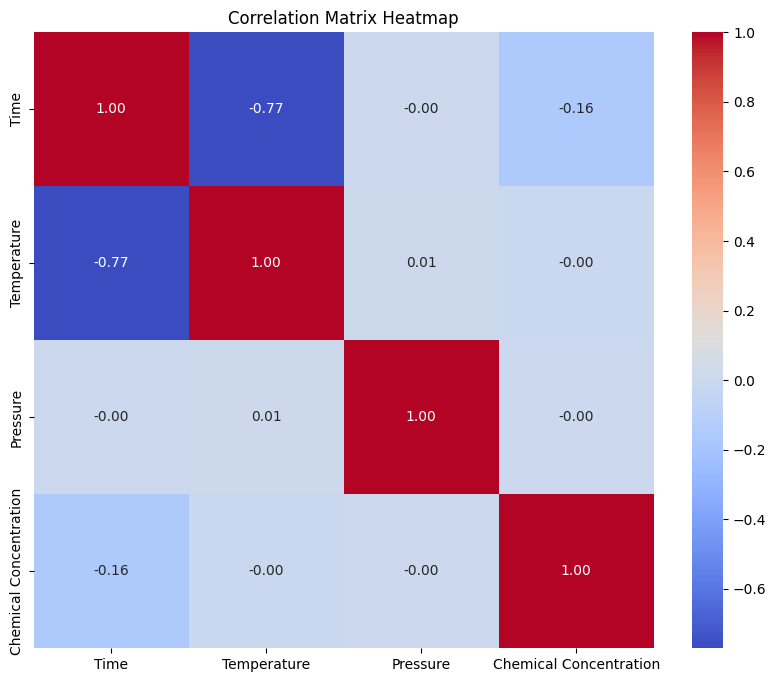

In [10]:
import seaborn as sns

# Heatmap for Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


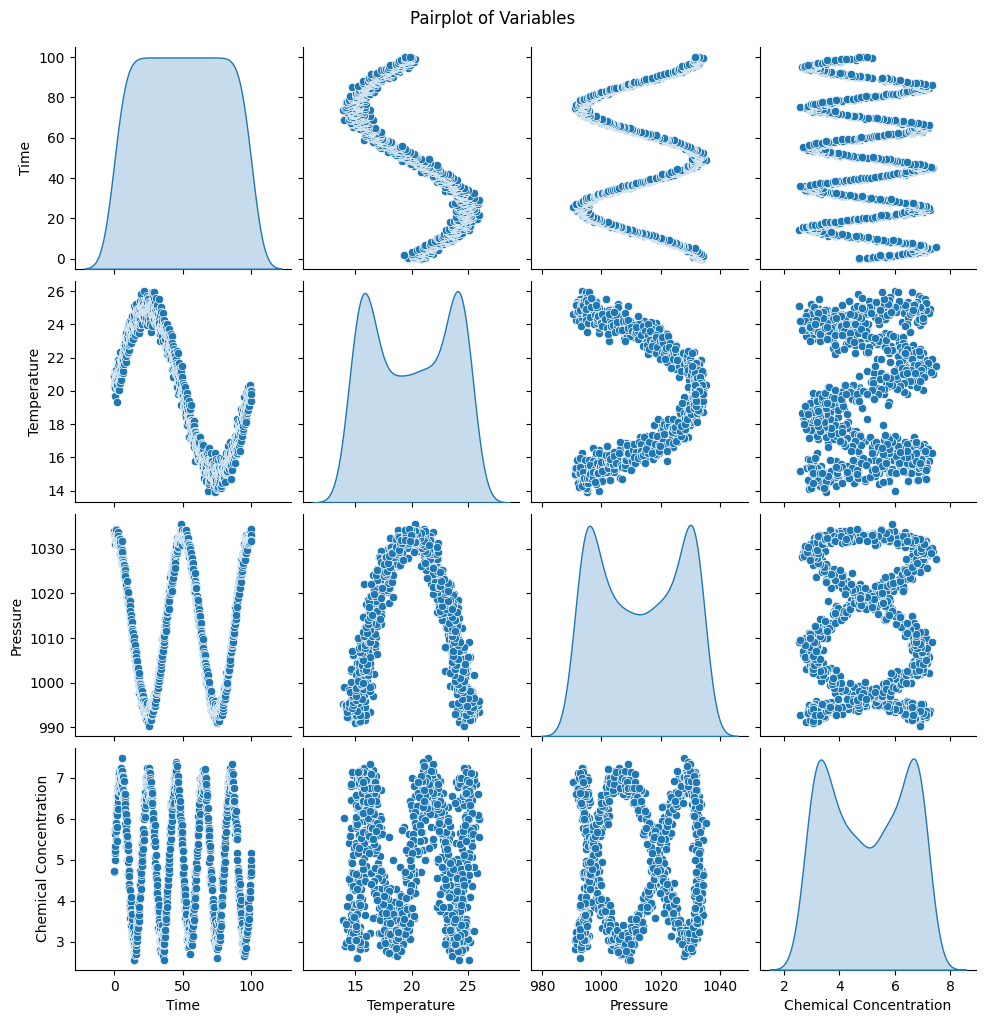

In [11]:
# Multi-dimensional Scatter Plots
sns.pairplot(ninja_data, diag_kind='kde')
plt.suptitle('Pairplot of Variables', y=1.02)
plt.show()
